<a href="https://colab.research.google.com/github/Ermisvivas/Analisis-de-Datos/blob/main/Regresion_Lineal_Ermis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Descripción general de los datos:
              Year  Selling_Price  Present_Price     Kms_Driven          year  \
count  2360.000000     301.000000     301.000000     301.000000  12468.000000   
mean   2016.068644       4.661296       7.628472   36947.205980   2013.555743   
std       3.435772       5.082812       8.644115   38886.883882      4.118485   
min    1988.000000       0.100000       0.320000     500.000000   1983.000000   
25%    2014.000000       0.900000       1.200000   15000.000000   2011.000000   
50%    2016.000000       3.600000       6.400000   32000.000000   2014.000000   
75%    2018.000000       6.000000       9.900000   48767.000000   2017.000000   
max    2022.000000      35.000000      92.600000  500000.000000   2020.000000   

       selling_price     km_driven        seats         Price     Kilometer  \
count   1.246800e+04  1.2468

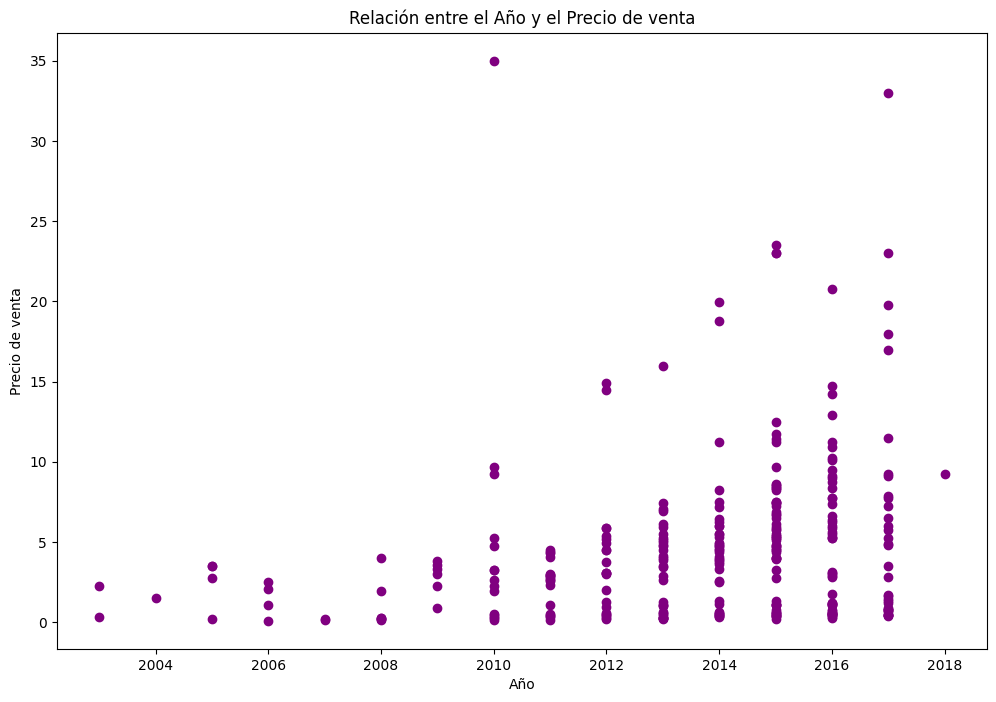

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['name' 'year' 'selling_price' 'km_driven' 'fuel' 'seller_type'
 'transmission' 'owner' 'mileage' 'engine' 'max_power' 'torque' 'seats'
 'Make' 'Model' 'Price' 'Kilometer' 'Fuel Type' 'Location' 'Color'
 'Seller Type' 'Engine' 'Max Power' 'Max Torque' 'Drivetrain' 'Length'
 'Width' 'Height' 'Seating Capacity' 'Fuel Tank Capacity']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



Regresión Lineal:
Mejores parámetros: {'fit_intercept': True, 'positive': False}
Error cuadrático medio: 3.448447970963748
R-cuadrado: 0.8502990897441183

Regresión Logística:
Mejores parámetros: {'C': 10, 'penalty': 'l2'}
Precisión: 1.0
Sensibilidad: 0.9375
Puntuación F1: 0.967741935483871


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_


Árboles de Decisión:
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error cuadrático medio: 1.758038069216757
R-cuadrado: 0.9236816383943616


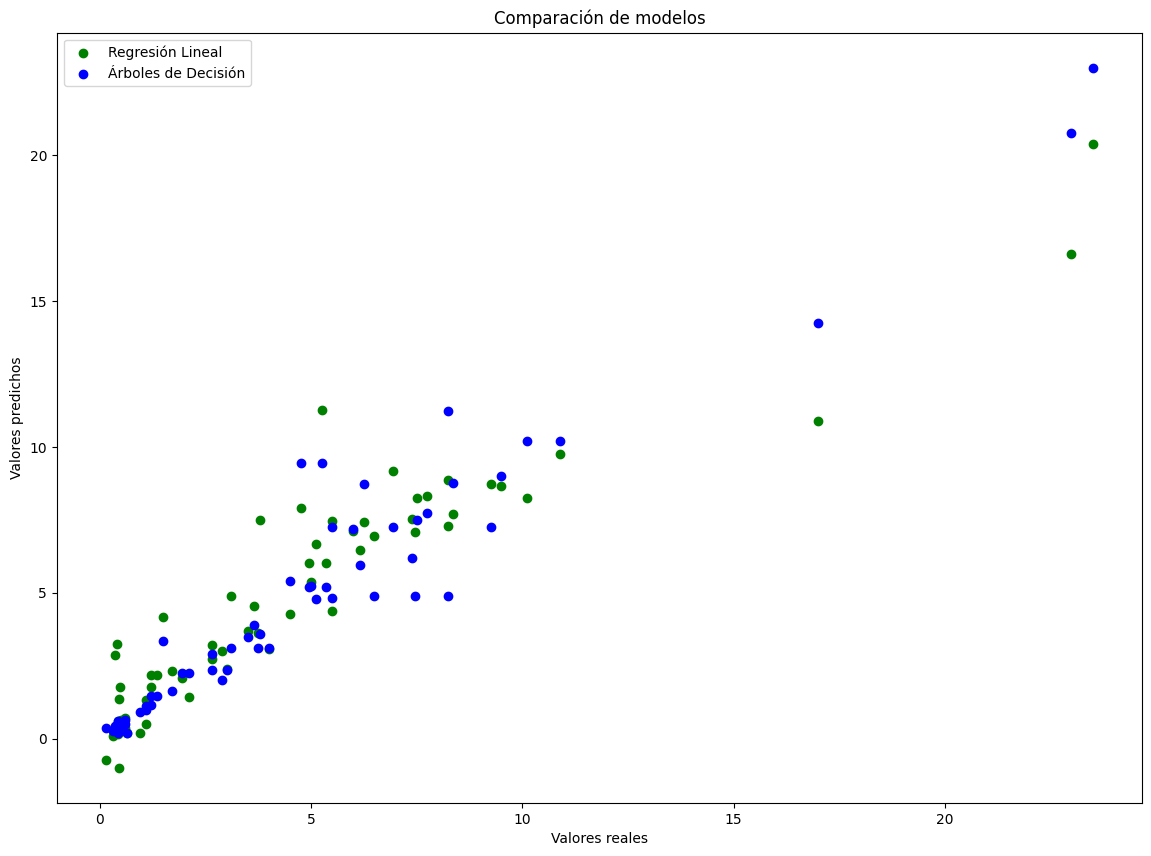

In [3]:
# Importar el módulo para montar Google Drive y configurar el directorio de trabajo
from google.colab import drive
drive.mount('/content/drive')

# Cambiar al directorio que contiene los conjuntos de datos
import os
os.chdir("/content/drive/MyDrive/certificados/Analisis de Datos/")

# Instalar las bibliotecas necesarias
!pip install --upgrade scikit-learn

# Importar las bibliotecas requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Utilizamos Seaborn para gráficos más elegantes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.impute import SimpleImputer

# Cargar los conjuntos de datos
datos1 = pd.read_csv('car data.csv')
datos2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
datos3 = pd.read_csv('Car details v3.csv')
datos4 = pd.read_csv('car details v4.csv')

# Concatenar los conjuntos de datos
data = pd.concat([datos1, datos2, datos3, datos4], ignore_index=True)

# Análisis exploratorio de datos
print("Descripción general de los datos:")
print(data.describe())

print("\nInformación sobre los datos:")
print(data.info())

print("\nVerificación de valores faltantes:")
print(data.isnull().sum())

# Visualizaciones y análisis adicionales
plt.figure(figsize=(12, 8))  # Ajustamos el tamaño de la figura
plt.scatter(data['Year'], data['Selling_Price'], color='purple')  # Cambiamos el color
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Relación entre el Año y el Precio de venta')
plt.show()

# Preprocesamiento de datos
# Verificar la presencia de las columnas necesarias
columnas_requeridas = ['Car_Name', 'Selling_Price', 'Fuel_Type', 'Transmission', 'Seller_Type']
columnas_faltantes = set(columnas_requeridas) - set(data.columns)
if columnas_faltantes:
    raise ValueError(f"Faltan las siguientes columnas en los conjuntos de datos: {columnas_faltantes}")

# Eliminar filas con valores faltantes en columnas específicas
data = data.dropna(subset=['Car_Name', 'Selling_Price', 'Fuel_Type', 'Transmission', 'Seller_Type'])

# Verificar que el DataFrame no esté vacío después de eliminar los valores faltantes
if data.empty:
    raise ValueError("El DataFrame está vacío después de eliminar los valores faltantes")

# Codificar las variables categóricas
codificador = LabelEncoder()
data.loc[:, 'Fuel_Type'] = codificador.fit_transform(data['Fuel_Type'])
data.loc[:, 'Transmission'] = codificador.fit_transform(data['Transmission'])
data.loc[:, 'Seller_Type'] = codificador.fit_transform(data['Seller_Type'])

# Seleccionar las características relevantes
if 'Car_Name' not in data.columns or 'Selling_Price' not in data.columns:
    raise ValueError("Las columnas 'Car_Name' y 'Selling_Price' no existen en el DataFrame")

X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Convertir el problema en una clasificación binaria
umbral_precio = y.median()  # Puedes ajustar el umbral según tus criterios
y_binario = (y > umbral_precio).astype(int)

# Imputar valores faltantes en X
imputador = SimpleImputer(strategy='mean')
X_imputado = imputador.fit_transform(X)

# Selección de características con SelectKBest
selector_kbest = SelectKBest(f_regression, k=5)
X_seleccionado_kbest = selector_kbest.fit_transform(X_imputado, y)

# Selección de características con RFE
selector_rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_seleccionado_rfe = selector_rfe.fit_transform(X_imputado, y)

# Dividir el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_seleccionado_kbest, y, test_size=0.2, random_state=42)
X_train_binario, X_test_binario, y_train_binario, y_test_binario = train_test_split(X_seleccionado_kbest, y_binario, test_size=0.2, random_state=42)

# Escalar los datos
escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train)
X_test_escalado = escalador.transform(X_test)
X_train_binario_escalado = escalador.fit_transform(X_train_binario)
X_test_binario_escalado = escalador.transform(X_test_binario)

# Regresión Lineal
reg_lineal = LinearRegression()
params_reg_lineal = {'fit_intercept': [True, False], 'positive': [True, False]}
busqueda_reg_lineal = GridSearchCV(reg_lineal, params_reg_lineal, cv=5)
busqueda_reg_lineal.fit(X_train_escalado, y_train)
mejor_reg_lineal = busqueda_reg_lineal.best_estimator_
y_pred_reg_lineal = mejor_reg_lineal.predict(X_test_escalado)
mse_reg_lineal = mean_squared_error(y_test, y_pred_reg_lineal)
r2_reg_lineal = r2_score(y_test, y_pred_reg_lineal)
print("\nRegresión Lineal:")
print("Mejores parámetros:", busqueda_reg_lineal.best_params_)
print("Error cuadrático medio:", mse_reg_lineal)
print("R-cuadrado:", r2_reg_lineal)

# Regresión Logística
reg_logistica = LogisticRegression()
params_reg_logistica = {'penalty': ['l2', 'none'], 'C': [0.1, 1, 10]}
busqueda_reg_logistica = GridSearchCV(reg_logistica, params_reg_logistica, cv=5)
busqueda_reg_logistica.fit(X_train_binario_escalado, y_train_binario)
mejor_reg_logistica = busqueda_reg_logistica.best_estimator_
y_pred_reg_logistica = mejor_reg_logistica.predict(X_test_binario_escalado)
precision_reg_logistica = accuracy_score(y_test_binario, y_pred_reg_logistica)
precision_reg_logistica = precision_score(y_test_binario, y_pred_reg_logistica)
sensibilidad_reg_logistica = recall_score(y_test_binario, y_pred_reg_logistica)
puntuacion_f1_reg_logistica = f1_score(y_test_binario, y_pred_reg_logistica)
print("\nRegresión Logística:")
print("Mejores parámetros:", busqueda_reg_logistica.best_params_)
print("Precisión:", precision_reg_logistica)
print("Sensibilidad:", sensibilidad_reg_logistica)
print("Puntuación F1:", puntuacion_f1_reg_logistica)

# Árboles de Decisión
arboles_decision = DecisionTreeRegressor()
params_arboles_decision = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
busqueda_arboles_decision = GridSearchCV(arboles_decision, params_arboles_decision, cv=5)
busqueda_arboles_decision.fit(X_train_escalado, y_train)
mejor_arboles_decision = busqueda_arboles_decision.best_estimator_
y_pred_arboles_decision = mejor_arboles_decision.predict(X_test_escalado)
mse_arboles_decision = mean_squared_error(y_test, y_pred_arboles_decision)
r2_arboles_decision = r2_score(y_test, y_pred_arboles_decision)
print("\nÁrboles de Decisión:")
print("Mejores parámetros:", busqueda_arboles_decision.best_params_)
print("Error cuadrático medio:", mse_arboles_decision)
print("R-cuadrado:", r2_arboles_decision)

# Gráficas de resultados
plt.figure(figsize=(14, 10))  # Cambiamos el tamaño de la figura
plt.scatter(y_test, y_pred_reg_lineal, label='Regresión Lineal', color='green')  # Cambiamos el color
plt.scatter(y_test, y_pred_arboles_decision, label='Árboles de Decisión', color='blue')  # Cambiamos el color
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.title('Comparación de modelos')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')